In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [4]:
print(f'Training samples {len(x_train):,}')
print(f'Test samples {len(x_test):,}')

Training samples 60,000
Test samples 10,000


In [5]:
def show(idx):
    print(y_train[idx])
    plt.imshow(x_train[idx])

4


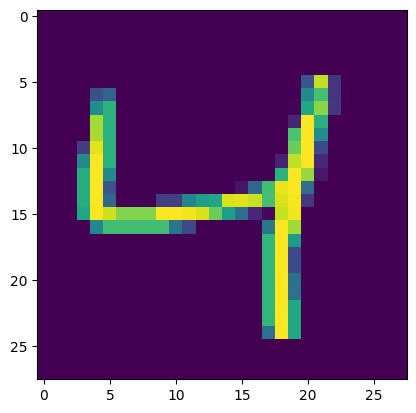

In [6]:
show(2)

In [7]:
np.random.seed(23)
tf.random.set_seed(23)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0003),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                15050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 251,060
Trainable params: 251,060
Non-trai

In [8]:
model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 3.6038 - accuracy: 0.3061
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4567 - accuracy: 0.5200
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1689 - accuracy: 0.6249
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9310 - accuracy: 0.7102
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7556 - accuracy: 0.7625
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6489 - accuracy: 0.8041
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5326 - accuracy: 0.8399
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4607 - accuracy: 0.8644
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3756 - accuracy: 0.8897
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.327

In [9]:

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1440 - accuracy: 0.9754


[0.14404034614562988, 0.9753999710083008]

In [10]:

model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
